# LOGISTIC REGRESSION

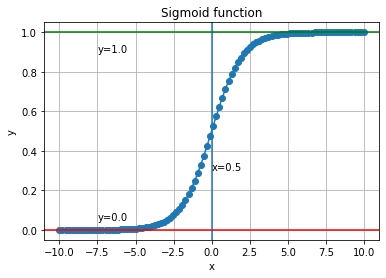

In [1]:
# sigmoid function
import numpy as np

x = np.linspace(-10,10,100)

def _sigmoidfc(x):
    s = 1/(1+np.exp(-x))
    return s

sigmoid = _sigmoidfc(x)

# Draw sigmoid function
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(x,sigmoid, marker = 'o')
plt.axvline(0)
plt.text(0.0, 0.3, "x=0.5")
plt.axhline(1, color="green")
plt.text(-7.5, 0.9, "y=1.0")
plt.axhline(0, color="red")
plt.text(-7.5, 0.05, "y=0.0")
ax.set(xlabel='x',ylabel='y')
plt.title('Sigmoid function')
ax.grid()
plt.show()

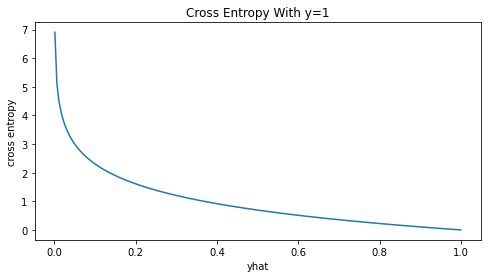

In [2]:
# Cross entropy related to yhat and y
def _cross_entropy(yhat,y):
    return -(y*np.log(yhat)+(1-y)*np.log((1-yhat)))
#Implement yhat from 0 to 1
yhat = np.linspace(0.001,0.999,200)

# Visualize cross entropy function
def _plot_crs_fc(yhat,y):
    cross_entropy = _cross_entropy(yhat,y)
    plt.figure(figsize = (8,4))
    plt.plot(yhat,cross_entropy)
    plt.xlabel('yhat')
    plt.ylabel('cross entropy')
    plt.title('Cross Entropy With y={}'.format(y))
    plt.show()
_plot_crs_fc(yhat,y=1)

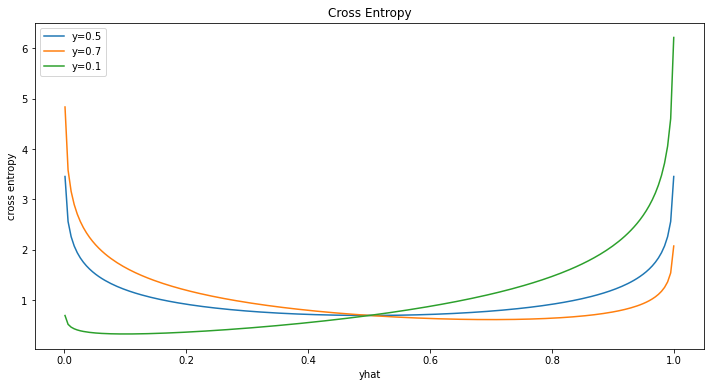

In [3]:
crs1 = _cross_entropy(yhat, y=0.5)
crs2 = _cross_entropy(yhat, y=0.7)
crs3 = _cross_entropy(yhat, y=0.1)
plt.figure(figsize = (12, 6))
plt.plot(yhat, crs1, label='y=0.5')
plt.plot(yhat, crs2, label='y=0.7')
plt.plot(yhat, crs3, label='y=0.1')
plt.xlabel('yhat')
plt.ylabel('cross entropy')
plt.title('Cross Entropy')
plt.legend(loc='best')
plt.show()

## Extreme condition of Cross Entropy

Để chứng minh cho nhận định giá trị của Cross Entropy đạt cực tiểu tại $y=\hat{y}$ không quá khó. Ở phần này tôi sẽ đưa ra một chứng minh trực quan cho bạn nào yêu toán bằng phương pháp Lagrange. Đối với những bạn không thực sự quan tâm tới toán có thể xem mục 3.3 về thực hành.

Proving that the value of Cross Entropy has local minimum at $y = \hat{y}$ is not too hard. We can use one method named Lagrange multiplier to prove intuitively.

### Lagrange multiplier

![title](picture/Screenshot2021-11-06113335.JPG)

### Điều kiện để Cross Entropy là cực trị

![titile](picture/Screenshot2021-11-06144111.png)

### Find optimal solution by *Gradient Descent*

**Gradient Descent** is an important technique in ML, eventually deep learning, which allow us to find the local extreme based on gradient. In fact, finding a solution to some loss function is not easy (too complex to differentiate or not convex).
=>> gradient descent is one of the best choice.

one of disadvantages of this method is the solution is not exact and the extreme is not global.

# Draw function $f(x) = x^2 - 2x + 5$

In [4]:
#Create value
x = np.arange(-9,11,0.1)

#define function f(x)
def _fc(x):
    return x*x - 2*x + 5

#Calculate f(x)

y = _fc(x)
# Take the first derivative of f(x)
y_grad = 2*x - 2
# Take some arbitrary points
x0,y0 = x[10],y[10]
x1,y1 = x[-20],y[-20]
#The local minimum of f(x)
x_star = 1
y_star = 4

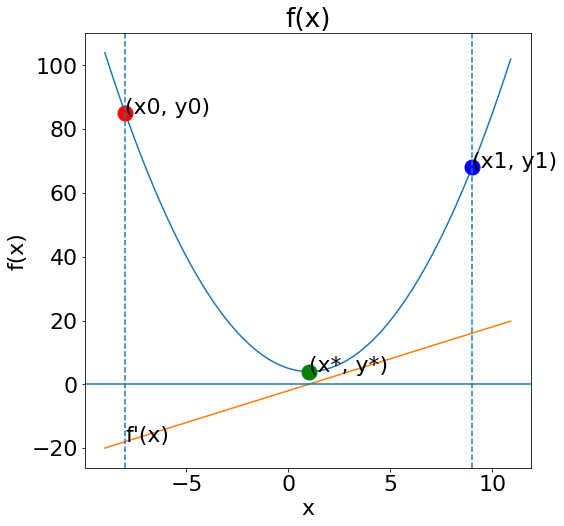

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.ylabel("f(x)")
plt.plot(x0, y0, marker="o", markersize=15, color="red")
plt.text(x0, y0, "(x0, y0)")
plt.plot(x1, y1, marker="o", markersize=15, color="blue")
plt.text(x1, y1, "(x1, y1)")
plt.text(x_star, y_star, "(x*, y*)")
plt.plot(x_star, y_star, marker="o", markersize=15, color="green")
plt.plot(x, y_grad, linestyle='-')
plt.axhline(0)
plt.axvline(x0, linestyle="--")
plt.axvline(x1, linestyle="--")
plt.text(x0, 2*x0-2, "f'(x)")
plt.xlabel("x")
plt.title("f(x)")
plt.show()

![titile](picture/Screenshot2021-11-06150812.png)

# LOGISTIC REGRESSION USING SKLEARN

To build Logistic Regression by Sklearn, we use module sklearn.linear_model.LogisticRegression.

Next, we will build a simple pipeline for bad dept classification problems by using Logistic Regression. The input data is hmeq. HMEQ includes information of dept of 5960 loans of buying houses. These are home loans where the borrower uses equity as collateral. 

In [27]:
# Read file HMEQ
import pandas as pd
#hmeq_pat = 'C:/Users/ASUS/Desktop/hmeq.csv'
#df = pd.read_csv(hmeq_pat)
df = pd.read_csv('http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv', header = 0, sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [28]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [29]:
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

number of numeric field:  9


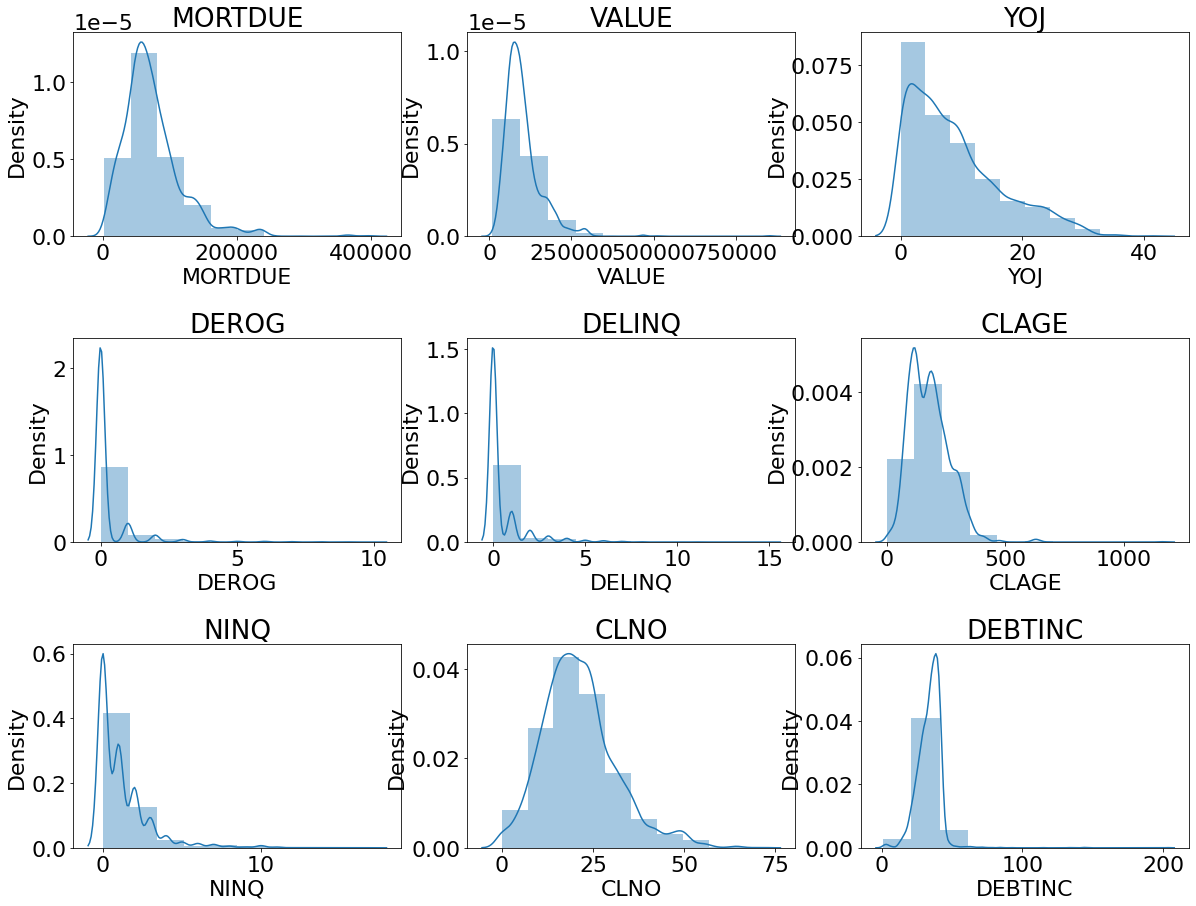

In [31]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

number of category field:  2


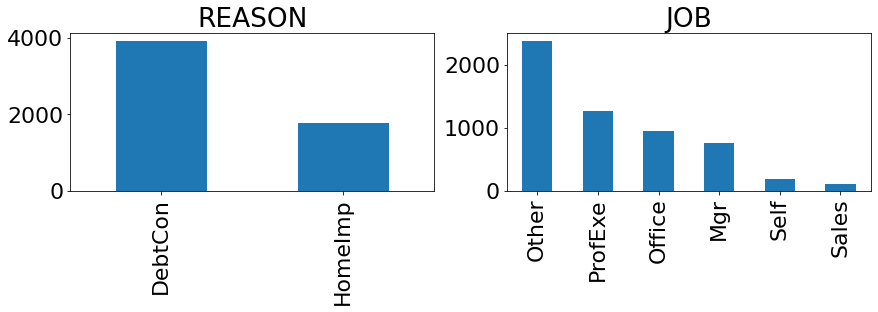

In [32]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

Phân chia tập huấn luyện/kiểm tra

In [33]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


In [34]:
# Xây dựng pipeline xử lý missing data
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

In [35]:
LogisticRegression(penalty='l2',
tol=0.0001, 
C=1.0, 
fit_intercept=True, 
class_weight=None, 
solver='lbfgs', 
max_iter=100)

LogisticRegression()

In [36]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", LogisticRegression(penalty='l2', C=0.5, max_iter=200, class_weight=[0.3, 0.7]))
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 0.82
Accuracy on test: 0.82


Kết quả mô hình đạt accuracy là 83% trên tập huấn luyện và 82% trên tập kiểm tra. Đây là một kết quả không quá chênh lệch giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định. Phương pháp hồi qui Logistic thường là phương pháp đơn giản nhất trong các lớp mô hình hồi qui nên kết quả của nó thường không phải là tốt nhất. Bạn đọc nên thử nghiệm với nhiều lớp mô hình khác như SVM, MLP, kNN, Random Forest, CART, Decision Tree để tìm ra lớp mô hình tốt nhất.
